In [1]:
# Packages loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
# Load earthquakes csv data
df = pd.read_csv(
    '../datasets/earthquakes.csv',
    usecols=['alert', 'cdi', 'code', 'dmin', 'felt', 'gap', 'ids', 'mag', 'magType', 'mmi', 'net', 'nst', 'place', 'rms', 'sig', 'sources', 'status', 'time', 'title', 'tsunami', 'type', 'types', 'tz']
)
df.head()

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
0,NaN,NaN,37389218,0.008693,NaN,85.0,",ci37389218,",1.35,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.19,28.0,",ci,",automatic,1.539475e+12,"M 1.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
1,NaN,NaN,37389202,0.020030,NaN,79.0,",ci37389202,",1.29,ml,NaN,ci,20.0,"9km NE of Aguanga, CA",0.29,26.0,",ci,",automatic,1.539475e+12,"M 1.3 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
2,NaN,4.4,37389194,0.021370,28.0,21.0,",ci37389194,",3.42,ml,NaN,ci,111.0,"8km NE of Aguanga, CA",0.22,192.0,",ci,",automatic,1.539475e+12,"M 3.4 - 8km NE of Aguanga, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
3,NaN,NaN,37389186,0.026180,NaN,39.0,",ci37389186,",0.44,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.17,3.0,",ci,",automatic,1.539475e+12,"M 0.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
4,NaN,NaN,73096941,0.077990,NaN,192.0,",nc73096941,",2.16,md,NaN,nc,18.0,"10km NW of Avenal, CA",0.05,72.0,",nc,",automatic,1.539475e+12,"M 2.2 - 10km NW of Avenal, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0


In [3]:
df.shape

(9333, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alert    59 non-null     object 
 1   cdi      329 non-null    float64
 2   code     9332 non-null   object 
 3   dmin     6139 non-null   float64
 4   felt     329 non-null    float64
 5   gap      6164 non-null   float64
 6   ids      9332 non-null   object 
 7   mag      9331 non-null   float64
 8   magType  9331 non-null   object 
 9   mmi      93 non-null     float64
 10  net      9332 non-null   object 
 11  nst      5364 non-null   float64
 12  place    9332 non-null   object 
 13  rms      9332 non-null   float64
 14  sig      9332 non-null   float64
 15  sources  9332 non-null   object 
 16  status   9332 non-null   object 
 17  time     9332 non-null   float64
 18  title    9332 non-null   object 
 19  tsunami  9332 non-null   float64
 20  type     9332 non-null   object 
 21  types    9332 

In [5]:
# Delete rows if all columns in row are null
df.dropna(how='all', inplace=True)

In [6]:
df.shape

(9332, 23)

In [7]:
df.alert.unique()

array([nan, 'green', 'red'], dtype=object)

In [8]:
# Get all not null values in alert
df.query("alert.notna()")

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
119,green,NaN,1000hbkz,2.62300,NaN,25.0,",pt18286001,at00pgjb1a,us1000hbkz,",6.70,mww,3.04,us,NaN,"262km NW of Ozernovskiy, Russia",0.98,691.0,",pt,at,us,",reviewed,1.539429e+12,"M 6.7 - 262km NW of Ozernovskiy, Russia",1.0,earthquake,",geoserve,ground-failure,impact-link,losspager...",600.0
181,green,NaN,1000hbhw,2.07700,NaN,23.0,",us1000hbhw,",5.20,mww,3.54,us,NaN,"25km E of Bitung, Indonesia",1.43,416.0,",us,",reviewed,1.539405e+12,"M 5.2 - 25km E of Bitung, Indonesia",0.0,earthquake,",geoserve,losspager,origin,phase-data,shakemap,",480.0
227,green,NaN,1000hbff,7.38500,NaN,27.0,",us1000hbff,",5.70,mww,3.48,us,NaN,"42km WNW of Sola, Vanuatu",1.18,500.0,",us,",reviewed,1.539390e+12,"M 5.7 - 42km WNW of Sola, Vanuatu",0.0,earthquake,",geoserve,losspager,origin,phase-data,shakemap,",660.0
262,green,4.1,1000hbcu,0.60000,64.0,74.0,",us1000hbcu,",5.70,mww,3.79,us,NaN,"13km E of Nueva Concepcion, Guatemala",0.83,526.0,",us,",reviewed,1.539379e+12,"M 5.7 - 13km E of Nueva Concepcion, Guatemala",0.0,earthquake,",dyfi,geoserve,losspager,moment-tensor,origin,...",-360.0
502,green,NaN,1000hax9,2.35600,NaN,45.0,",us1000hax9,",5.60,mww,4.69,us,NaN,"128km SE of Kimbe, Papua New Guinea",1.58,482.0,",us,",reviewed,1.539313e+12,"M 5.6 - 128km SE of Kimbe, Papua New Guinea",1.0,earthquake,",geoserve,losspager,moment-tensor,origin,phase...",600.0
758,green,NaN,1000hafx,5.28300,NaN,58.0,",us1000hafx,",5.60,mww,3.73,us,NaN,"139km S of Leksula, Indonesia",0.93,482.0,",us,",reviewed,1.539227e+12,"M 5.6 - 139km S of Leksula, Indonesia",0.0,earthquake,",geoserve,losspager,moment-tensor,origin,phase...",480.0
800,green,NaN,1000hacw,3.87900,NaN,18.0,",pt18283004,at00pgeomo,us1000hacw,",6.50,mww,4.26,us,NaN,"148km S of Severo-Kuril'sk, Russia",0.91,650.0,",pt,at,us,",reviewed,1.539213e+12,"M 6.5 - 148km S of Severo-Kuril'sk, Russia",1.0,earthquake,",geoserve,ground-failure,impact-link,losspager...",600.0
817,green,NaN,1000habl,0.90700,NaN,12.0,",us1000habl,",6.20,mww,4.59,us,NaN,"94km SW of Kokopo, Papua New Guinea",1.14,591.0,",us,",reviewed,1.539209e+12,"M 6.2 - 94km SW of Kokopo, Papua New Guinea",1.0,earthquake,",geoserve,ground-failure,losspager,moment-tens...",600.0
827,green,NaN,1000haaj,2.01400,NaN,30.0,",us1000haaj,",5.90,mww,5.15,us,NaN,"117km ESE of Kimbe, Papua New Guinea",1.27,536.0,",us,",reviewed,1.539206e+12,"M 5.9 - 117km ESE of Kimbe, Papua New Guinea",1.0,earthquake,",geoserve,losspager,moment-tensor,origin,phase...",600.0
830,green,NaN,1000haab,2.01000,NaN,30.0,",us1000haab,",5.90,mww,4.69,us,NaN,"113km ESE of Kimbe, Papua New Guinea",1.16,536.0,",us,",reviewed,1.539205e+12,"M 5.9 - 113km ESE of Kimbe, Papua New Guinea",1.0,earthquake,",geoserve,losspager,moment-tensor,origin,phase...",600.0


In [9]:
df.query("alert.isna()")

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
0,NaN,NaN,37389218,0.008693,NaN,85.0,",ci37389218,",1.35,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.19,28.0,",ci,",automatic,1.539475e+12,"M 1.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
1,NaN,NaN,37389202,0.020030,NaN,79.0,",ci37389202,",1.29,ml,NaN,ci,20.0,"9km NE of Aguanga, CA",0.29,26.0,",ci,",automatic,1.539475e+12,"M 1.3 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
2,NaN,4.4,37389194,0.021370,28.0,21.0,",ci37389194,",3.42,ml,NaN,ci,111.0,"8km NE of Aguanga, CA",0.22,192.0,",ci,",automatic,1.539475e+12,"M 3.4 - 8km NE of Aguanga, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
3,NaN,NaN,37389186,0.026180,NaN,39.0,",ci37389186,",0.44,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.17,3.0,",ci,",automatic,1.539475e+12,"M 0.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
4,NaN,NaN,73096941,0.077990,NaN,192.0,",nc73096941,",2.16,md,NaN,nc,18.0,"10km NW of Avenal, CA",0.05,72.0,",nc,",automatic,1.539475e+12,"M 2.2 - 10km NW of Avenal, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,NaN,NaN,73086771,0.018060,NaN,185.0,",nc73086771,",0.62,md,NaN,nc,13.0,"9km ENE of Mammoth Lakes, CA",0.03,6.0,",nc,",reviewed,1.537230e+12,"M 0.6 - 9km ENE of Mammoth Lakes, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
9329,NaN,NaN,38063967,0.030410,NaN,50.0,",ci38063967,",1.00,ml,NaN,ci,28.0,"3km W of Julian, CA",0.21,15.0,",ci,",reviewed,1.537230e+12,"M 1.0 - 3km W of Julian, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0
9330,NaN,NaN,2018261000,0.452600,NaN,276.0,",pr2018261000,",2.40,md,NaN,pr,9.0,"35km NNE of Hatillo, Puerto Rico",0.41,89.0,",pr,",reviewed,1.537230e+12,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",0.0,earthquake,",geoserve,origin,phase-data,",-240.0
9331,NaN,NaN,38063959,0.018650,NaN,61.0,",ci38063959,",1.10,ml,NaN,ci,27.0,"9km NE of Aguanga, CA",0.10,19.0,",ci,",reviewed,1.537230e+12,"M 1.1 - 9km NE of Aguanga, CA",0.0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0


In [10]:
# update null alert values with 'no alert'
df.loc[df["alert"].isna(), "alert"] = "no alert" or df["alert"].fillna('no alert')

In [11]:
df.alert.unique()

array(['no alert', 'green', 'red'], dtype=object)

In [12]:
df.cdi.unique()

array([nan, 4.4, 2. , 4.5, 3. , 2.2, 2.7, 3.1, 4.1, 3.8, 1. , 2.8, 3.3,
       2.5, 3.4, 4.3, 2.6, 3.6, 4.8, 2.9, 2.4, 4.6, 0. , 5.5, 3.9, 5. ,
       3.7, 5.4, 3.2, 5.3, 4.7, 8.4, 4.9, 4. , 2.3, 6.8, 3.5, 7.3])

In [13]:
df.query("cdi.notna()")

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
2,no alert,4.4,37389194,0.021370,28.0,21.0,",ci37389194,",3.42,ml,NaN,ci,111.0,"8km NE of Aguanga, CA",0.22,192.0,",ci,",automatic,1.539475e+12,"M 3.4 - 8km NE of Aguanga, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
66,no alert,2.0,73096831,0.007582,1.0,50.0,",nc73096831,us1000hbqe,",2.76,md,NaN,nc,49.0,"6km NNW of Pinnacles, CA",0.10,117.0,",nc,us,",automatic,1.539450e+12,"M 2.8 - 6km NNW of Pinnacles, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
91,no alert,4.5,73096771,0.009227,11.0,50.0,",nc73096771,us1000hbp6,",3.22,ml,NaN,nc,60.0,"6km NNW of Pinnacles, CA",0.07,164.0,",nc,us,",automatic,1.539438e+12,"M 3.2 - 6km NNW of Pinnacles, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
108,no alert,3.0,73096741,0.028500,7.0,49.0,",nc73096741,",2.81,md,NaN,nc,54.0,"5km WNW of San Juan Bautista, CA",0.11,124.0,",nc,",automatic,1.539434e+12,"M 2.8 - 5km WNW of San Juan Bautista, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
137,no alert,2.2,20280138,NaN,1.0,NaN,",ak20280138,",1.70,ml,NaN,ak,NaN,"45km NW of Talkeetna, Alaska",0.79,45.0,",ak,",automatic,1.539422e+12,"M 1.7 - 45km NW of Talkeetna, Alaska",0.0,earthquake,",dyfi,geoserve,origin,",-540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9213,no alert,3.1,2000hg94,2.114000,3.0,68.0,",us2000hg94,",4.70,mb,NaN,us,NaN,"2km ESE of Lokokrangan, Indonesia",1.28,341.0,",us,",reviewed,1.537256e+12,"M 4.7 - 2km ESE of Lokokrangan, Indonesia",0.0,earthquake,",dyfi,geoserve,origin,phase-data,",480.0
9305,no alert,2.0,2000hg6v,3.078000,1.0,68.0,",us2000hg6v,",5.10,mb,NaN,us,NaN,"34km NW of Finschhafen, Papua New Guinea",0.89,400.0,",us,",reviewed,1.537236e+12,"M 5.1 - 34km NW of Finschhafen, Papua New Guinea",1.0,earthquake,",dyfi,geoserve,origin,phase-data,",600.0
9310,no alert,2.7,2000hg6g,0.651000,1.0,63.0,",us2000hg6g,",4.80,mb,NaN,us,NaN,"11km ESE of Rotorua, New Zealand",0.94,355.0,",us,",reviewed,1.537235e+12,"M 4.8 - 11km ESE of Rotorua, New Zealand",0.0,earthquake,",dyfi,geoserve,origin,phase-data,",720.0
9312,no alert,2.7,73086796,0.574800,6.0,268.0,",nc73086796,",3.27,ml,2.04,nc,29.0,"68km W of Petrolia, CA",0.20,166.0,",nc,",reviewed,1.537233e+12,"M 3.3 - 68km W of Petrolia, CA",0.0,earthquake,",dyfi,geoserve,nearby-cities,origin,phase-data...",-480.0


In [14]:
df.query("cdi.isna()")

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
0,no alert,NaN,37389218,0.008693,NaN,85.0,",ci37389218,",1.35,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.19,28.0,",ci,",automatic,1.539475e+12,"M 1.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
1,no alert,NaN,37389202,0.020030,NaN,79.0,",ci37389202,",1.29,ml,NaN,ci,20.0,"9km NE of Aguanga, CA",0.29,26.0,",ci,",automatic,1.539475e+12,"M 1.3 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
3,no alert,NaN,37389186,0.026180,NaN,39.0,",ci37389186,",0.44,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.17,3.0,",ci,",automatic,1.539475e+12,"M 0.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
4,no alert,NaN,73096941,0.077990,NaN,192.0,",nc73096941,",2.16,md,NaN,nc,18.0,"10km NW of Avenal, CA",0.05,72.0,",nc,",automatic,1.539475e+12,"M 2.2 - 10km NW of Avenal, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0
5,no alert,NaN,2018286011,0.437300,NaN,158.0,",pr2018286011,",2.61,md,NaN,pr,10.0,"55km ESE of Punta Cana, Dominican Republic",0.41,105.0,",pr,",reviewed,1.539474e+12,"M 2.6 - 55km ESE of Punta Cana, Dominican Repu...",0.0,earthquake,",geoserve,origin,phase-data,",-300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,no alert,NaN,73086771,0.018060,NaN,185.0,",nc73086771,",0.62,md,NaN,nc,13.0,"9km ENE of Mammoth Lakes, CA",0.03,6.0,",nc,",reviewed,1.537230e+12,"M 0.6 - 9km ENE of Mammoth Lakes, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
9329,no alert,NaN,38063967,0.030410,NaN,50.0,",ci38063967,",1.00,ml,NaN,ci,28.0,"3km W of Julian, CA",0.21,15.0,",ci,",reviewed,1.537230e+12,"M 1.0 - 3km W of Julian, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0
9330,no alert,NaN,2018261000,0.452600,NaN,276.0,",pr2018261000,",2.40,md,NaN,pr,9.0,"35km NNE of Hatillo, Puerto Rico",0.41,89.0,",pr,",reviewed,1.537230e+12,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",0.0,earthquake,",geoserve,origin,phase-data,",-240.0
9331,no alert,NaN,38063959,0.018650,NaN,61.0,",ci38063959,",1.10,ml,NaN,ci,27.0,"9km NE of Aguanga, CA",0.10,19.0,",ci,",reviewed,1.537230e+12,"M 1.1 - 9km NE of Aguanga, CA",0.0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0


In [15]:
# get all not null values in cdi
df.query("cdi.notna()")["cdi"].tolist()

[4.4,
 2.0,
 4.5,
 3.0,
 2.2,
 2.7,
 2.7,
 3.1,
 2.0,
 4.1,
 3.8,
 3.1,
 3.8,
 2.0,
 3.1,
 2.0,
 1.0,
 2.8,
 2.0,
 3.1,
 4.1,
 2.2,
 3.3,
 2.0,
 2.7,
 2.2,
 3.8,
 2.0,
 2.7,
 1.0,
 2.5,
 3.4,
 2.7,
 2.7,
 4.1,
 2.0,
 4.3,
 3.1,
 3.1,
 2.7,
 2.6,
 3.1,
 2.7,
 3.6,
 2.0,
 2.2,
 2.7,
 2.0,
 1.0,
 2.0,
 4.8,
 2.2,
 2.2,
 3.1,
 3.8,
 2.0,
 2.7,
 2.2,
 3.1,
 2.2,
 2.9,
 3.4,
 2.4,
 1.0,
 3.1,
 3.4,
 2.0,
 2.2,
 2.2,
 3.8,
 2.9,
 3.1,
 2.7,
 1.0,
 2.2,
 1.0,
 4.6,
 2.0,
 4.3,
 2.7,
 2.7,
 1.0,
 2.0,
 0.0,
 3.1,
 2.2,
 2.2,
 1.0,
 3.8,
 5.5,
 2.7,
 2.0,
 2.0,
 2.7,
 2.0,
 2.2,
 2.0,
 2.0,
 2.7,
 2.2,
 3.9,
 4.3,
 2.2,
 2.0,
 2.0,
 2.2,
 3.8,
 1.0,
 2.7,
 2.0,
 2.7,
 5.0,
 2.0,
 3.1,
 2.0,
 2.2,
 2.0,
 2.2,
 3.1,
 3.4,
 2.5,
 2.0,
 2.0,
 2.2,
 2.0,
 3.1,
 2.0,
 2.9,
 2.6,
 3.1,
 2.2,
 2.2,
 2.0,
 2.2,
 2.9,
 4.1,
 3.7,
 2.2,
 2.7,
 3.1,
 3.8,
 5.4,
 3.1,
 3.4,
 3.8,
 2.0,
 1.0,
 3.1,
 2.0,
 2.0,
 2.0,
 2.0,
 4.1,
 3.1,
 3.6,
 3.4,
 2.7,
 3.8,
 2.0,
 2.2,
 2.2,
 2.2,
 2.2,
 4.1,
 2.2,
 2.0,
 4.1

In [16]:
# get each value occurance in cdi
df.cdi.value_counts()

cdi
2.0    89
2.2    43
2.7    42
3.1    36
3.8    25
1.0    14
3.4    13
4.3     8
4.1     8
3.6     6
2.9     5
3.3     4
3.0     3
5.4     3
2.8     3
2.5     3
2.6     2
0.0     2
3.5     2
4.5     1
4.4     1
4.6     1
2.4     1
4.8     1
3.9     1
5.0     1
3.7     1
3.2     1
5.5     1
5.3     1
4.7     1
4.9     1
8.4     1
4.0     1
2.3     1
6.8     1
7.3     1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

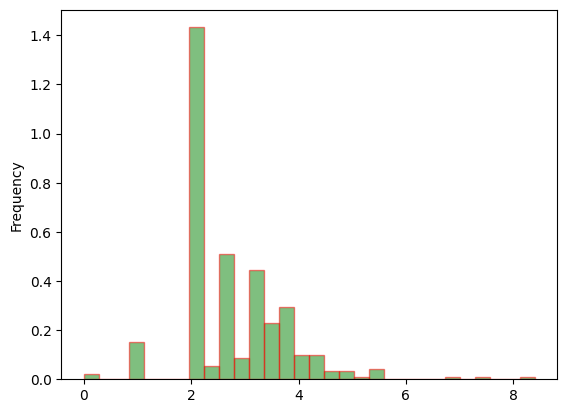

In [17]:
# histogram for cdi
df.cdi.plot(kind='hist', bins=30, density=True, alpha=0.5, color='green', edgecolor='red')

<Axes: >

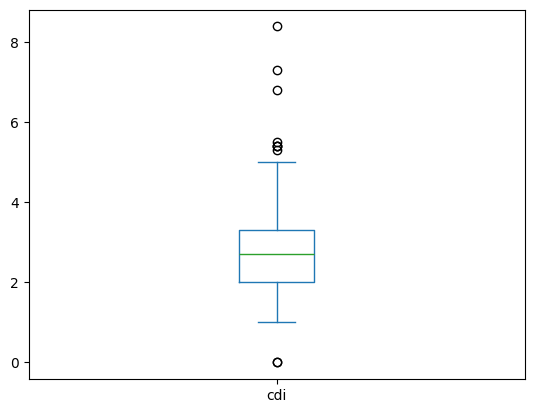

In [18]:
df["cdi"].plot(kind="box")

In [19]:
# get IQR and IQR will be used for skew data distributions to identify outliers
Q1 = df.cdi.quantile(0.25)
Q3 = df["cdi"].quantile(0.75)
IQR = Q3 - Q1

In [20]:
# Identify outliers
df[(df['cdi'] < Q1 - 1.5 * IQR) | (df['cdi'] > Q3 + 1.5 * IQR)]

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
1747,no alert,0.0,73094821,0.01174,0.0,53.0,",nc73094821,",1.55,md,NaN,nc,35.0,"4km W of Cobb, CA",0.05,37.0,",nc,",reviewed,1.538920e+12,"M 1.6 - 4km W of Cobb, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
1919,green,5.5,1000h8an,1.64200,185.0,19.0,",us1000h8an,",5.90,mww,4.94,us,NaN,"21km WNW of Ti Port-de-Paix, Haiti",0.81,637.0,",us,",reviewed,1.538871e+12,"M 5.9 - 21km WNW of Ti Port-de-Paix, Haiti",0.0,earthquake,",dyfi,geoserve,losspager,moment-tensor,origin,...",-300.0
3736,no alert,5.4,1000h5c4,0.92300,18.0,68.0,",us1000h5c4,",5.30,mww,NaN,us,NaN,"28km W of Cintalapa de Figueroa, Mexico",1.18,442.0,",us,",reviewed,1.538430e+12,"M 5.3 - 28km W of Cintalapa de Figueroa, Mexico",0.0,earthquake,",dyfi,geoserve,moment-tensor,origin,phase-data,",-360.0
5212,no alert,5.3,1000h3s0,0.51600,38.0,64.0,",us1000h3s0,",5.40,mb,NaN,us,NaN,"67km ENE of Sainte-Marie, Martinique",0.93,469.0,",us,",reviewed,1.538138e+12,"M 5.4 - 67km ENE of Sainte-Marie, Martinique",0.0,earthquake,",dyfi,geoserve,origin,phase-data,",-240.0
5264,red,8.4,1000h3p4,1.58900,18.0,27.0,",us1000h3p4,us1000h4p4,",7.50,mww,9.12,us,NaN,"78km N of Palu, Indonesia",1.27,2015.0,",us,us,",reviewed,1.538129e+12,"M 7.5 - 78km N of Palu, Indonesia",1.0,earthquake,",dyfi,finite-fault,general-text,geoserve,groun...",480.0
6394,no alert,0.0,37368922,0.18580,0.0,90.0,",ci37368922,",2.19,ml,NaN,ci,38.0,"24km ESE of Campo, CA",0.19,74.0,",ci,",reviewed,1.537908e+12,"M 2.2 - 24km ESE of Campo, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
7504,no alert,6.8,2000hixc,0.72800,5.0,46.0,",us2000hixc,",4.40,mb,NaN,us,NaN,"6km WNW of Villa Elisa, Dominican Republic",0.95,301.0,",us,",reviewed,1.537687e+12,"M 4.4 - 6km WNW of Villa Elisa, Dominican Repu...",0.0,earthquake,",dyfi,geoserve,origin,phase-data,",-240.0
7532,no alert,5.4,2000hiw5,0.72200,159.0,36.0,",us2000hiw5,",5.20,mww,NaN,us,NaN,"3km NW of Villa Elisa, Dominican Republic",1.38,502.0,",us,",reviewed,1.537682e+12,"M 5.2 - 3km NW of Villa Elisa, Dominican Republic",0.0,earthquake,",dyfi,geoserve,origin,phase-data,",-240.0
8724,no alert,5.4,2000hh8t,0.76500,7.0,97.0,",us2000hh8t,",5.00,mww,NaN,us,NaN,"79km NNW of Iquique, Chile",0.68,388.0,",us,",reviewed,1.537383e+12,"M 5.0 - 79km NNW of Iquique, Chile",0.0,earthquake,",dyfi,geoserve,moment-tensor,origin,phase-data,",-240.0
9146,green,7.3,2000hgcc,2.91400,5.0,26.0,",us2000hgcc,",5.80,mww,6.87,us,NaN,"48km ESE of Gizo, Solomon Islands",1.02,521.0,",us,",reviewed,1.537272e+12,"M 5.8 - 48km ESE of Gizo, Solomon Islands",0.0,earthquake,",dyfi,geoserve,ground-failure,losspager,moment...",660.0


In [21]:
# Removing outliers
df = df[((df['cdi'] > Q1 - 1.5 * IQR) & (df['cdi'] < Q3 + 1.5 * IQR)) | (df['cdi'].isna())]

In [22]:
df.shape

(9322, 23)

<Axes: >

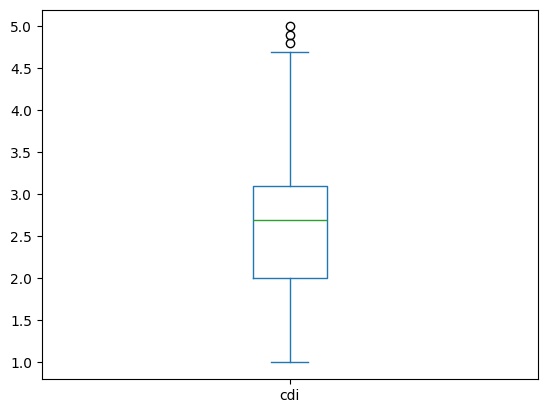

In [23]:
df.cdi.plot(kind='box')

In [24]:
df.loc[:, 'cdi'] = df['cdi'].fillna(df['cdi'].median())

In [25]:
df.head()

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
0,no alert,2.7,37389218,0.008693,NaN,85.0,",ci37389218,",1.35,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.19,28.0,",ci,",automatic,1.539475e+12,"M 1.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
1,no alert,2.7,37389202,0.020030,NaN,79.0,",ci37389202,",1.29,ml,NaN,ci,20.0,"9km NE of Aguanga, CA",0.29,26.0,",ci,",automatic,1.539475e+12,"M 1.3 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
2,no alert,4.4,37389194,0.021370,28.0,21.0,",ci37389194,",3.42,ml,NaN,ci,111.0,"8km NE of Aguanga, CA",0.22,192.0,",ci,",automatic,1.539475e+12,"M 3.4 - 8km NE of Aguanga, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
3,no alert,2.7,37389186,0.026180,NaN,39.0,",ci37389186,",0.44,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.17,3.0,",ci,",automatic,1.539475e+12,"M 0.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
4,no alert,2.7,73096941,0.077990,NaN,192.0,",nc73096941,",2.16,md,NaN,nc,18.0,"10km NW of Avenal, CA",0.05,72.0,",nc,",automatic,1.539475e+12,"M 2.2 - 10km NW of Avenal, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0


In [26]:
df.loc[:, 'dmin'] = df['dmin'].fillna(df['dmin'].median())

In [27]:
df.head()

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
0,no alert,2.7,37389218,0.008693,NaN,85.0,",ci37389218,",1.35,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.19,28.0,",ci,",automatic,1.539475e+12,"M 1.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
1,no alert,2.7,37389202,0.020030,NaN,79.0,",ci37389202,",1.29,ml,NaN,ci,20.0,"9km NE of Aguanga, CA",0.29,26.0,",ci,",automatic,1.539475e+12,"M 1.3 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
2,no alert,4.4,37389194,0.021370,28.0,21.0,",ci37389194,",3.42,ml,NaN,ci,111.0,"8km NE of Aguanga, CA",0.22,192.0,",ci,",automatic,1.539475e+12,"M 3.4 - 8km NE of Aguanga, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
3,no alert,2.7,37389186,0.026180,NaN,39.0,",ci37389186,",0.44,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.17,3.0,",ci,",automatic,1.539475e+12,"M 0.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
4,no alert,2.7,73096941,0.077990,NaN,192.0,",nc73096941,",2.16,md,NaN,nc,18.0,"10km NW of Avenal, CA",0.05,72.0,",nc,",automatic,1.539475e+12,"M 2.2 - 10km NW of Avenal, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0


In [28]:
df.query('felt.notna()')

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
2,no alert,4.4,37389194,0.021370,28.0,21.0,",ci37389194,",3.42,ml,NaN,ci,111.0,"8km NE of Aguanga, CA",0.22,192.0,",ci,",automatic,1.539475e+12,"M 3.4 - 8km NE of Aguanga, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
66,no alert,2.0,73096831,0.007582,1.0,50.0,",nc73096831,us1000hbqe,",2.76,md,NaN,nc,49.0,"6km NNW of Pinnacles, CA",0.10,117.0,",nc,us,",automatic,1.539450e+12,"M 2.8 - 6km NNW of Pinnacles, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
91,no alert,4.5,73096771,0.009227,11.0,50.0,",nc73096771,us1000hbp6,",3.22,ml,NaN,nc,60.0,"6km NNW of Pinnacles, CA",0.07,164.0,",nc,us,",automatic,1.539438e+12,"M 3.2 - 6km NNW of Pinnacles, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
108,no alert,3.0,73096741,0.028500,7.0,49.0,",nc73096741,",2.81,md,NaN,nc,54.0,"5km WNW of San Juan Bautista, CA",0.11,124.0,",nc,",automatic,1.539434e+12,"M 2.8 - 5km WNW of San Juan Bautista, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
137,no alert,2.2,20280138,0.059000,1.0,NaN,",ak20280138,",1.70,ml,NaN,ak,NaN,"45km NW of Talkeetna, Alaska",0.79,45.0,",ak,",automatic,1.539422e+12,"M 1.7 - 45km NW of Talkeetna, Alaska",0.0,earthquake,",dyfi,geoserve,origin,",-540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9213,no alert,3.1,2000hg94,2.114000,3.0,68.0,",us2000hg94,",4.70,mb,NaN,us,NaN,"2km ESE of Lokokrangan, Indonesia",1.28,341.0,",us,",reviewed,1.537256e+12,"M 4.7 - 2km ESE of Lokokrangan, Indonesia",0.0,earthquake,",dyfi,geoserve,origin,phase-data,",480.0
9305,no alert,2.0,2000hg6v,3.078000,1.0,68.0,",us2000hg6v,",5.10,mb,NaN,us,NaN,"34km NW of Finschhafen, Papua New Guinea",0.89,400.0,",us,",reviewed,1.537236e+12,"M 5.1 - 34km NW of Finschhafen, Papua New Guinea",1.0,earthquake,",dyfi,geoserve,origin,phase-data,",600.0
9310,no alert,2.7,2000hg6g,0.651000,1.0,63.0,",us2000hg6g,",4.80,mb,NaN,us,NaN,"11km ESE of Rotorua, New Zealand",0.94,355.0,",us,",reviewed,1.537235e+12,"M 4.8 - 11km ESE of Rotorua, New Zealand",0.0,earthquake,",dyfi,geoserve,origin,phase-data,",720.0
9312,no alert,2.7,73086796,0.574800,6.0,268.0,",nc73086796,",3.27,ml,2.04,nc,29.0,"68km W of Petrolia, CA",0.20,166.0,",nc,",reviewed,1.537233e+12,"M 3.3 - 68km W of Petrolia, CA",0.0,earthquake,",dyfi,geoserve,nearby-cities,origin,phase-data...",-480.0


<Axes: ylabel='Frequency'>

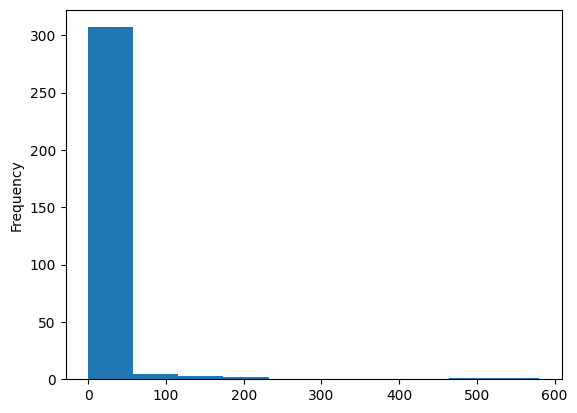

In [29]:
df.felt.plot.hist()

<Axes: >

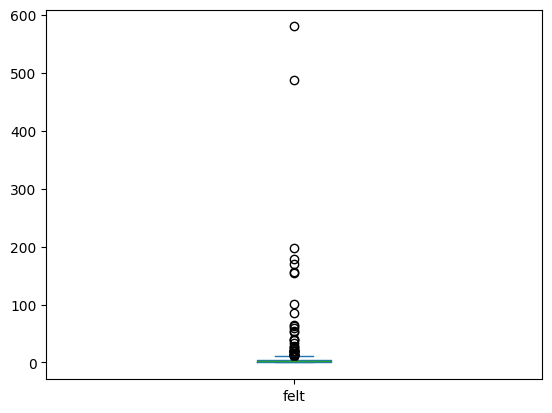

In [30]:
df['felt'].plot.box()

In [31]:
Q1 = df['felt'].quantile(0.25)
Q3 = df['felt'].quantile(0.75)
IQR = Q3 - Q1

In [32]:
# Identify outliers
df[(df['felt'] < Q1 - 1.5 * IQR) | (df['felt'] > Q3 + 1.5 * IQR)]

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
2,no alert,4.4,37389194,0.02137,28.0,21.00,",ci37389194,",3.42,ml,NaN,ci,111.0,"8km NE of Aguanga, CA",0.2200,192.0,",ci,",automatic,1.539475e+12,"M 3.4 - 8km NE of Aguanga, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
206,no alert,2.7,37387938,0.04513,13.0,76.00,",ci37387938,",2.33,ml,NaN,ci,50.0,"11km WNW of Malibu, CA",0.2800,87.0,",ci,",automatic,1.539396e+12,"M 2.3 - 11km WNW of Malibu, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
262,green,4.1,1000hbcu,0.60000,64.0,74.00,",us1000hbcu,",5.70,mww,3.79,us,NaN,"13km E of Nueva Concepcion, Guatemala",0.8300,526.0,",us,",reviewed,1.539379e+12,"M 5.7 - 13km E of Nueva Concepcion, Guatemala",0.0,earthquake,",dyfi,geoserve,losspager,moment-tensor,origin,...",-360.0
294,no alert,3.8,37387626,0.05774,19.0,29.00,",ci37387626,",3.05,ml,4.57,ci,116.0,"9km WSW of Wrightwood, CA",0.2300,150.0,",ci,",reviewed,1.539370e+12,"M 3.1 - 9km WSW of Wrightwood, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
378,no alert,2.8,70646927,0.04111,15.0,44.00,",hv70646927,",3.32,ml,NaN,hv,60.0,"9km NNW of Volcano, Hawaii",0.1000,174.0,",hv,",reviewed,1.539341e+12,"M 3.3 - 9km NNW of Volcano, Hawaii",0.0,earthquake,",dyfi,geoserve,origin,phase-data,",-600.0
477,no alert,4.1,1000haxq,2.16800,59.0,97.00,",us1000haxq,",5.20,mww,NaN,us,NaN,"7km ESE of Asahi, Japan",1.6000,440.0,",us,",reviewed,1.539318e+12,"M 5.2 - 7km ESE of Asahi, Japan",0.0,earthquake,",dyfi,geoserve,moment-tensor,origin,phase-data,",540.0
863,green,4.3,1000ha6q,1.05100,170.0,27.00,",us1000ha6q,",6.00,mww,5.17,us,NaN,"39km NNE of Sumberanyar, Indonesia",1.0900,627.0,",us,",reviewed,1.539197e+12,"M 6.0 - 39km NNE of Sumberanyar, Indonesia",0.0,earthquake,",dyfi,geoserve,ground-failure,losspager,moment...",480.0
1397,no alert,2.9,38317760,0.05536,54.0,44.00,",ci38317760,us1000h8zz,",2.98,ml,3.15,ci,59.0,"6km S of Ojai, CA",0.3200,152.0,",ci,us,",reviewed,1.539035e+12,"M 3.0 - 6km S of Ojai, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
1404,no alert,3.4,38317720,0.10700,157.0,46.00,",ci38317720,us1000h8zn,",3.23,ml,NaN,ci,48.0,"5km WNW of Coso Junction, CA",0.1500,214.0,",ci,us,",reviewed,1.539034e+12,"M 3.2 - 5km WNW of Coso Junction, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
1605,no alert,3.1,1000h8l6,0.91300,25.0,127.00,",us1000h8l6,",3.60,ml,NaN,us,NaN,"1km WNW of Hope Bay, Jamaica",0.4900,207.0,",us,",reviewed,1.538966e+12,"M 3.6 - 1km WNW of Hope Bay, Jamaica",0.0,earthquake,",dyfi,geoserve,origin,phase-data,",-300.0


In [33]:
df = df[((df['felt'] > Q1 - 1.5 * IQR) & (df['felt'] < Q3 + 1.5 * IQR)) | (df['felt'].isna())]

In [34]:
df

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
0,no alert,2.7,37389218,0.008693,NaN,85.0,",ci37389218,",1.35,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.19,28.0,",ci,",automatic,1.539475e+12,"M 1.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
1,no alert,2.7,37389202,0.020030,NaN,79.0,",ci37389202,",1.29,ml,NaN,ci,20.0,"9km NE of Aguanga, CA",0.29,26.0,",ci,",automatic,1.539475e+12,"M 1.3 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
3,no alert,2.7,37389186,0.026180,NaN,39.0,",ci37389186,",0.44,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.17,3.0,",ci,",automatic,1.539475e+12,"M 0.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
4,no alert,2.7,73096941,0.077990,NaN,192.0,",nc73096941,",2.16,md,NaN,nc,18.0,"10km NW of Avenal, CA",0.05,72.0,",nc,",automatic,1.539475e+12,"M 2.2 - 10km NW of Avenal, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0
5,no alert,2.7,2018286011,0.437300,NaN,158.0,",pr2018286011,",2.61,md,NaN,pr,10.0,"55km ESE of Punta Cana, Dominican Republic",0.41,105.0,",pr,",reviewed,1.539474e+12,"M 2.6 - 55km ESE of Punta Cana, Dominican Repu...",0.0,earthquake,",geoserve,origin,phase-data,",-300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,no alert,2.7,73086771,0.018060,NaN,185.0,",nc73086771,",0.62,md,NaN,nc,13.0,"9km ENE of Mammoth Lakes, CA",0.03,6.0,",nc,",reviewed,1.537230e+12,"M 0.6 - 9km ENE of Mammoth Lakes, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
9329,no alert,2.7,38063967,0.030410,NaN,50.0,",ci38063967,",1.00,ml,NaN,ci,28.0,"3km W of Julian, CA",0.21,15.0,",ci,",reviewed,1.537230e+12,"M 1.0 - 3km W of Julian, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0
9330,no alert,2.7,2018261000,0.452600,NaN,276.0,",pr2018261000,",2.40,md,NaN,pr,9.0,"35km NNE of Hatillo, Puerto Rico",0.41,89.0,",pr,",reviewed,1.537230e+12,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",0.0,earthquake,",geoserve,origin,phase-data,",-240.0
9331,no alert,2.7,38063959,0.018650,NaN,61.0,",ci38063959,",1.10,ml,NaN,ci,27.0,"9km NE of Aguanga, CA",0.10,19.0,",ci,",reviewed,1.537230e+12,"M 1.1 - 9km NE of Aguanga, CA",0.0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0


In [35]:
df.loc[:, 'felt'] = df['felt'].fillna(df['felt'].median())

In [36]:
df

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
0,no alert,2.7,37389218,0.008693,1.0,85.0,",ci37389218,",1.35,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.19,28.0,",ci,",automatic,1.539475e+12,"M 1.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
1,no alert,2.7,37389202,0.020030,1.0,79.0,",ci37389202,",1.29,ml,NaN,ci,20.0,"9km NE of Aguanga, CA",0.29,26.0,",ci,",automatic,1.539475e+12,"M 1.3 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
3,no alert,2.7,37389186,0.026180,1.0,39.0,",ci37389186,",0.44,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.17,3.0,",ci,",automatic,1.539475e+12,"M 0.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
4,no alert,2.7,73096941,0.077990,1.0,192.0,",nc73096941,",2.16,md,NaN,nc,18.0,"10km NW of Avenal, CA",0.05,72.0,",nc,",automatic,1.539475e+12,"M 2.2 - 10km NW of Avenal, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0
5,no alert,2.7,2018286011,0.437300,1.0,158.0,",pr2018286011,",2.61,md,NaN,pr,10.0,"55km ESE of Punta Cana, Dominican Republic",0.41,105.0,",pr,",reviewed,1.539474e+12,"M 2.6 - 55km ESE of Punta Cana, Dominican Repu...",0.0,earthquake,",geoserve,origin,phase-data,",-300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,no alert,2.7,73086771,0.018060,1.0,185.0,",nc73086771,",0.62,md,NaN,nc,13.0,"9km ENE of Mammoth Lakes, CA",0.03,6.0,",nc,",reviewed,1.537230e+12,"M 0.6 - 9km ENE of Mammoth Lakes, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
9329,no alert,2.7,38063967,0.030410,1.0,50.0,",ci38063967,",1.00,ml,NaN,ci,28.0,"3km W of Julian, CA",0.21,15.0,",ci,",reviewed,1.537230e+12,"M 1.0 - 3km W of Julian, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0
9330,no alert,2.7,2018261000,0.452600,1.0,276.0,",pr2018261000,",2.40,md,NaN,pr,9.0,"35km NNE of Hatillo, Puerto Rico",0.41,89.0,",pr,",reviewed,1.537230e+12,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",0.0,earthquake,",geoserve,origin,phase-data,",-240.0
9331,no alert,2.7,38063959,0.018650,1.0,61.0,",ci38063959,",1.10,ml,NaN,ci,27.0,"9km NE of Aguanga, CA",0.10,19.0,",ci,",reviewed,1.537230e+12,"M 1.1 - 9km NE of Aguanga, CA",0.0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0


In [37]:
df.query('gap.isna()')

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
6,no alert,2.7,20280432,0.059,1.0,NaN,",ak20280432,",1.7,ml,NaN,ak,NaN,"105km W of Talkeetna, Alaska",0.54,44.0,",ak,",automatic,1.539473e+12,"M 1.7 - 105km W of Talkeetna, Alaska",0.0,earthquake,",geoserve,origin,",-540.0
15,no alert,2.7,20280430,0.059,1.0,NaN,",ak20280430,",2.0,ml,NaN,ak,NaN,"156km WNW of Haines Junction, Canada",0.34,62.0,",ak,",automatic,1.539470e+12,"M 2.0 - 156km WNW of Haines Junction, Canada",0.0,earthquake,",geoserve,origin,",-480.0
18,no alert,2.7,20280424,0.059,1.0,NaN,",ak20280424,",2.0,ml,NaN,ak,NaN,"57km SSW of Kaktovik, Alaska",0.98,62.0,",ak,",automatic,1.539469e+12,"M 2.0 - 57km SSW of Kaktovik, Alaska",0.0,earthquake,",geoserve,origin,",-540.0
21,no alert,2.7,20280421,0.059,1.0,NaN,",ak20280421,",1.7,ml,NaN,ak,NaN,"64km SSW of Salcha, Alaska",0.85,44.0,",ak,",automatic,1.539468e+12,"M 1.7 - 64km SSW of Salcha, Alaska",0.0,earthquake,",geoserve,origin,",-540.0
26,no alert,2.7,20280415,0.059,1.0,NaN,",ak20280415,us1000hbta,",2.8,ml,NaN,ak,NaN,"111km NNW of Arctic Village, Alaska",0.81,121.0,",ak,us,",automatic,1.539466e+12,"M 2.8 - 111km NNW of Arctic Village, Alaska",0.0,earthquake,",geoserve,origin,phase-data,",-540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9311,no alert,2.7,20257039,0.059,1.0,NaN,",ak20257039,",1.1,ml,NaN,ak,NaN,"59km NNE of Sutton-Alpine, Alaska",0.56,19.0,",ak,",automatic,1.537234e+12,"M 1.1 - 59km NNE of Sutton-Alpine, Alaska",0.0,earthquake,",geoserve,origin,",-540.0
9313,no alert,2.7,20257031,0.059,1.0,NaN,",ak20257031,",2.5,ml,NaN,ak,NaN,"134km NW of Arctic Village, Alaska",0.91,96.0,",ak,",automatic,1.537233e+12,"M 2.5 - 134km NW of Arctic Village, Alaska",0.0,earthquake,",geoserve,origin,",-540.0
9314,no alert,2.7,20257028,0.059,1.0,NaN,",ak20257028,",1.5,ml,NaN,ak,NaN,"88km ESE of Whittier, Alaska",1.12,35.0,",ak,",automatic,1.537233e+12,"M 1.5 - 88km ESE of Whittier, Alaska",0.0,earthquake,",geoserve,origin,",-540.0
9315,no alert,2.7,20257026,0.059,1.0,NaN,",ak20257026,",2.0,ml,NaN,ak,NaN,"132km WNW of Arctic Village, Alaska",0.71,62.0,",ak,",automatic,1.537233e+12,"M 2.0 - 132km WNW of Arctic Village, Alaska",0.0,earthquake,",geoserve,origin,",-540.0


<Axes: ylabel='Frequency'>

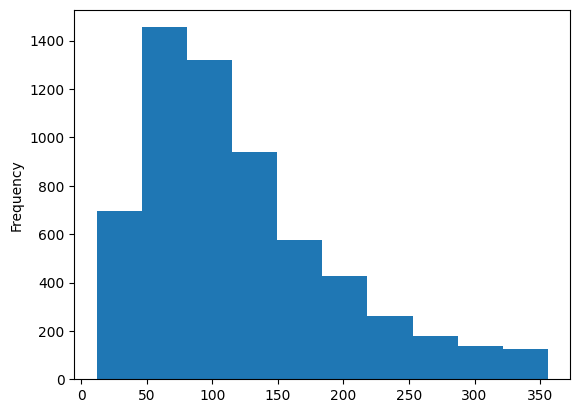

In [38]:
df['gap'].plot(kind='hist')

<Axes: >

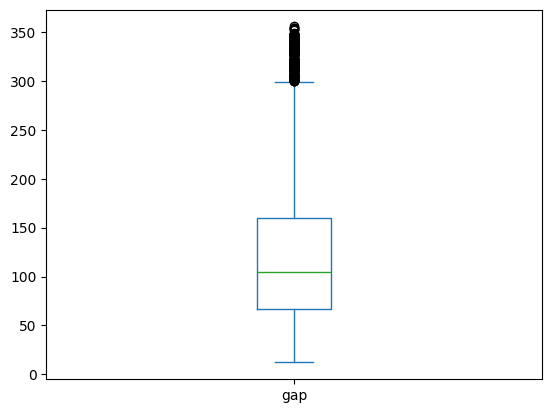

In [39]:
df['gap'].plot(kind='box')

In [40]:
df.loc[:, 'gap'] = df['gap'].fillna(df['gap'].median())

In [41]:
df

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
0,no alert,2.7,37389218,0.008693,1.0,85.0,",ci37389218,",1.35,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.19,28.0,",ci,",automatic,1.539475e+12,"M 1.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
1,no alert,2.7,37389202,0.020030,1.0,79.0,",ci37389202,",1.29,ml,NaN,ci,20.0,"9km NE of Aguanga, CA",0.29,26.0,",ci,",automatic,1.539475e+12,"M 1.3 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
3,no alert,2.7,37389186,0.026180,1.0,39.0,",ci37389186,",0.44,ml,NaN,ci,26.0,"9km NE of Aguanga, CA",0.17,3.0,",ci,",automatic,1.539475e+12,"M 0.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
4,no alert,2.7,73096941,0.077990,1.0,192.0,",nc73096941,",2.16,md,NaN,nc,18.0,"10km NW of Avenal, CA",0.05,72.0,",nc,",automatic,1.539475e+12,"M 2.2 - 10km NW of Avenal, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0
5,no alert,2.7,2018286011,0.437300,1.0,158.0,",pr2018286011,",2.61,md,NaN,pr,10.0,"55km ESE of Punta Cana, Dominican Republic",0.41,105.0,",pr,",reviewed,1.539474e+12,"M 2.6 - 55km ESE of Punta Cana, Dominican Repu...",0.0,earthquake,",geoserve,origin,phase-data,",-300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,no alert,2.7,73086771,0.018060,1.0,185.0,",nc73086771,",0.62,md,NaN,nc,13.0,"9km ENE of Mammoth Lakes, CA",0.03,6.0,",nc,",reviewed,1.537230e+12,"M 0.6 - 9km ENE of Mammoth Lakes, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
9329,no alert,2.7,38063967,0.030410,1.0,50.0,",ci38063967,",1.00,ml,NaN,ci,28.0,"3km W of Julian, CA",0.21,15.0,",ci,",reviewed,1.537230e+12,"M 1.0 - 3km W of Julian, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0
9330,no alert,2.7,2018261000,0.452600,1.0,276.0,",pr2018261000,",2.40,md,NaN,pr,9.0,"35km NNE of Hatillo, Puerto Rico",0.41,89.0,",pr,",reviewed,1.537230e+12,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",0.0,earthquake,",geoserve,origin,phase-data,",-240.0
9331,no alert,2.7,38063959,0.018650,1.0,61.0,",ci38063959,",1.10,ml,NaN,ci,27.0,"9km NE of Aguanga, CA",0.10,19.0,",ci,",reviewed,1.537230e+12,"M 1.1 - 9km NE of Aguanga, CA",0.0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9281 entries, 0 to 9332
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alert    9281 non-null   object 
 1   cdi      9281 non-null   float64
 2   code     9281 non-null   object 
 3   dmin     9281 non-null   float64
 4   felt     9281 non-null   float64
 5   gap      9281 non-null   float64
 6   ids      9281 non-null   object 
 7   mag      9280 non-null   float64
 8   magType  9280 non-null   object 
 9   mmi      77 non-null     float64
 10  net      9281 non-null   object 
 11  nst      5341 non-null   float64
 12  place    9281 non-null   object 
 13  rms      9281 non-null   float64
 14  sig      9281 non-null   float64
 15  sources  9281 non-null   object 
 16  status   9281 non-null   object 
 17  time     9281 non-null   float64
 18  title    9281 non-null   object 
 19  tsunami  9281 non-null   float64
 20  type     9281 non-null   object 
 21  types    9281 non-n

<Axes: >

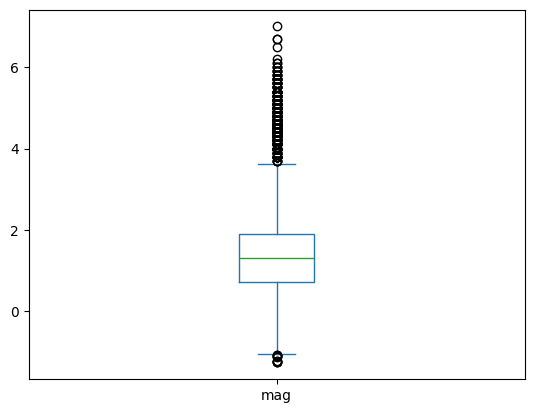

In [43]:
df['mag'].plot(kind='box')

In [44]:
df.query('mag.isna()')

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
6405,no alert,2.7,73089631,0.01657,1.0,102.0,",nc73089631,",NaN,NaN,NaN,nc,8.0,"13km NW of Parkfield, CA",0.03,0.0,",nc,",reviewed,1.537906e+12,"M ? - 13km NW of Parkfield, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0


In [45]:
Q1 = df['mag'].quantile(0.25)
Q3 = df['mag'].quantile(0.75)
IQR = Q3 - Q1

In [46]:
df[(df['mag'] < Q1 - 1.5 * IQR) | (df['mag'] > 1.5 + 1.5 * IQR)]

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
9,no alert,2.7,1000hbtn,3.191,1.0,37.0,",us1000hbtn,",4.7,mb,NaN,us,NaN,"219km SSE of Saparua, Indonesia",0.78,340.0,",us,",reviewed,1.539473e+12,"M 4.7 - 219km SSE of Saparua, Indonesia",0.0,earthquake,",geoserve,origin,phase-data,",540.0
13,no alert,2.7,1000hbti,2.193,1.0,157.0,",us1000hbti,",4.5,mb,NaN,us,NaN,"120km SSW of Banda Aceh, Indonesia",0.69,312.0,",us,",reviewed,1.539471e+12,"M 4.5 - 120km SSW of Banda Aceh, Indonesia",0.0,earthquake,",geoserve,origin,phase-data,",360.0
37,no alert,2.7,1000hbsa,1.541,1.0,51.0,",us1000hbsa,",5.0,mww,NaN,us,NaN,"165km NNW of Flying Fish Cove, Christmas Island",0.95,385.0,",us,",reviewed,1.539460e+12,"M 5.0 - 165km NNW of Flying Fish Cove, Christm...",1.0,earthquake,",geoserve,origin,phase-data,",420.0
56,no alert,2.7,1000hbrc,4.807,1.0,124.0,",us1000hbrc,",4.6,mb,NaN,us,NaN,"242km NNW of Farallon de Pajaros, Northern Mar...",0.92,326.0,",us,",reviewed,1.539453e+12,"M 4.6 - 242km NNW of Farallon de Pajaros, Nort...",0.0,earthquake,",geoserve,origin,phase-data,",600.0
68,no alert,2.7,1000hbqa,1.415,1.0,72.0,",us1000hbqa,",4.6,mb,NaN,us,NaN,"160km NNW of Nago, Japan",1.00,326.0,",us,",reviewed,1.539449e+12,"M 4.6 - 160km NNW of Nago, Japan",0.0,earthquake,",geoserve,origin,phase-data,",480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,no alert,2.7,2000hg7a,1.041,1.0,114.0,",us2000hg7a,",4.2,mb,NaN,us,NaN,"2km NE of Kato Achaia, Greece",0.84,271.0,",us,",reviewed,1.537239e+12,"M 4.2 - 2km NE of Kato Achaia, Greece",0.0,earthquake,",geoserve,origin,phase-data,",120.0
9305,no alert,2.0,2000hg6v,3.078,1.0,68.0,",us2000hg6v,",5.1,mb,NaN,us,NaN,"34km NW of Finschhafen, Papua New Guinea",0.89,400.0,",us,",reviewed,1.537236e+12,"M 5.1 - 34km NW of Finschhafen, Papua New Guinea",1.0,earthquake,",dyfi,geoserve,origin,phase-data,",600.0
9310,no alert,2.7,2000hg6g,0.651,1.0,63.0,",us2000hg6g,",4.8,mb,NaN,us,NaN,"11km ESE of Rotorua, New Zealand",0.94,355.0,",us,",reviewed,1.537235e+12,"M 4.8 - 11km ESE of Rotorua, New Zealand",0.0,earthquake,",dyfi,geoserve,origin,phase-data,",720.0
9320,no alert,2.7,2000hg5w,1.663,1.0,40.0,",us2000hg5w,",4.4,mb,NaN,us,NaN,"58km W of San Antonio de los Cobres, Argentina",0.81,298.0,",us,",reviewed,1.537232e+12,"M 4.4 - 58km W of San Antonio de los Cobres, A...",0.0,earthquake,",geoserve,origin,phase-data,",-180.0


In [47]:
df.loc[:, 'mag'] = df['mag'].fillna(df['mag'].median()) 

In [48]:
df['magType'].unique()

array(['ml', 'md', 'mb', 'mww', 'mb_lg', 'mwr', 'mw', 'mh', 'ms_20',
       'mwb', nan], dtype=object)

In [49]:
df['magType'].value_counts()

magType
ml       6780
md       1793
mb        594
mww        54
mb_lg      29
mwr        13
mh         12
mw          2
mwb         2
ms_20       1
Name: count, dtype: int64

In [50]:
df.loc[:, 'magType'] = df['magType'].fillna(df['magType'].mode()[0])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9281 entries, 0 to 9332
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alert    9281 non-null   object 
 1   cdi      9281 non-null   float64
 2   code     9281 non-null   object 
 3   dmin     9281 non-null   float64
 4   felt     9281 non-null   float64
 5   gap      9281 non-null   float64
 6   ids      9281 non-null   object 
 7   mag      9281 non-null   float64
 8   magType  9281 non-null   object 
 9   mmi      77 non-null     float64
 10  net      9281 non-null   object 
 11  nst      5341 non-null   float64
 12  place    9281 non-null   object 
 13  rms      9281 non-null   float64
 14  sig      9281 non-null   float64
 15  sources  9281 non-null   object 
 16  status   9281 non-null   object 
 17  time     9281 non-null   float64
 18  title    9281 non-null   object 
 19  tsunami  9281 non-null   float64
 20  type     9281 non-null   object 
 21  types    9281 non-n

In [52]:
df['mmi'].unique()

array([ nan, 3.04, 3.54, 3.48, 1.96, 4.69, 3.73, 4.26, 4.59, 5.15, 7.46,
       4.79, 3.72, 2.81, 4.39, 3.99, 3.97, 2.33, 1.  , 3.39, 2.08, 4.57,
       0.  , 3.11, 1.86, 2.34, 3.94, 2.84, 3.59, 3.52, 3.49, 4.42, 4.51,
       4.67, 5.27, 5.2 , 4.38, 2.83, 4.19, 4.41, 6.09, 6.16, 6.95, 6.15,
       6.71, 3.35, 1.92, 3.4 , 2.06, 3.3 , 3.68, 3.86, 2.51, 3.34, 1.87,
       4.28, 1.91, 2.68, 3.71, 4.23, 3.83, 5.96, 1.66, 2.04])

<Axes: ylabel='Frequency'>

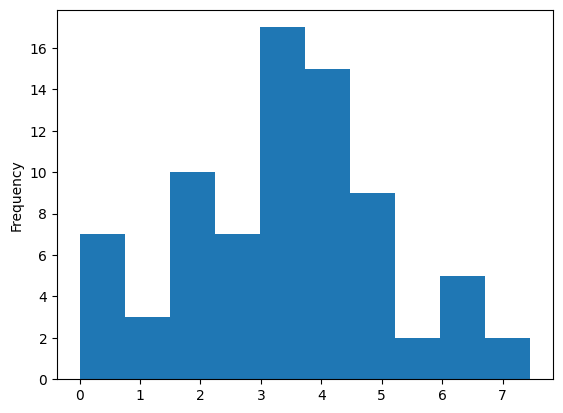

In [53]:
df['mmi'].plot(kind='hist')

<Axes: >

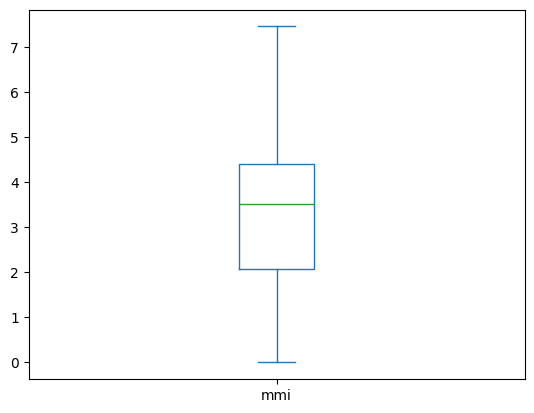

In [54]:
df['mmi'].plot(kind='box')

In [55]:
df.loc[:, 'mmi'] = df['mmi'].fillna(df['mmi'].mean())

In [56]:
df

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
0,no alert,2.7,37389218,0.008693,1.0,85.0,",ci37389218,",1.35,ml,3.395455,ci,26.0,"9km NE of Aguanga, CA",0.19,28.0,",ci,",automatic,1.539475e+12,"M 1.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
1,no alert,2.7,37389202,0.020030,1.0,79.0,",ci37389202,",1.29,ml,3.395455,ci,20.0,"9km NE of Aguanga, CA",0.29,26.0,",ci,",automatic,1.539475e+12,"M 1.3 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
3,no alert,2.7,37389186,0.026180,1.0,39.0,",ci37389186,",0.44,ml,3.395455,ci,26.0,"9km NE of Aguanga, CA",0.17,3.0,",ci,",automatic,1.539475e+12,"M 0.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
4,no alert,2.7,73096941,0.077990,1.0,192.0,",nc73096941,",2.16,md,3.395455,nc,18.0,"10km NW of Avenal, CA",0.05,72.0,",nc,",automatic,1.539475e+12,"M 2.2 - 10km NW of Avenal, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0
5,no alert,2.7,2018286011,0.437300,1.0,158.0,",pr2018286011,",2.61,md,3.395455,pr,10.0,"55km ESE of Punta Cana, Dominican Republic",0.41,105.0,",pr,",reviewed,1.539474e+12,"M 2.6 - 55km ESE of Punta Cana, Dominican Repu...",0.0,earthquake,",geoserve,origin,phase-data,",-300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,no alert,2.7,73086771,0.018060,1.0,185.0,",nc73086771,",0.62,md,3.395455,nc,13.0,"9km ENE of Mammoth Lakes, CA",0.03,6.0,",nc,",reviewed,1.537230e+12,"M 0.6 - 9km ENE of Mammoth Lakes, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
9329,no alert,2.7,38063967,0.030410,1.0,50.0,",ci38063967,",1.00,ml,3.395455,ci,28.0,"3km W of Julian, CA",0.21,15.0,",ci,",reviewed,1.537230e+12,"M 1.0 - 3km W of Julian, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0
9330,no alert,2.7,2018261000,0.452600,1.0,276.0,",pr2018261000,",2.40,md,3.395455,pr,9.0,"35km NNE of Hatillo, Puerto Rico",0.41,89.0,",pr,",reviewed,1.537230e+12,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",0.0,earthquake,",geoserve,origin,phase-data,",-240.0
9331,no alert,2.7,38063959,0.018650,1.0,61.0,",ci38063959,",1.10,ml,3.395455,ci,27.0,"9km NE of Aguanga, CA",0.10,19.0,",ci,",reviewed,1.537230e+12,"M 1.1 - 9km NE of Aguanga, CA",0.0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9281 entries, 0 to 9332
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alert    9281 non-null   object 
 1   cdi      9281 non-null   float64
 2   code     9281 non-null   object 
 3   dmin     9281 non-null   float64
 4   felt     9281 non-null   float64
 5   gap      9281 non-null   float64
 6   ids      9281 non-null   object 
 7   mag      9281 non-null   float64
 8   magType  9281 non-null   object 
 9   mmi      9281 non-null   float64
 10  net      9281 non-null   object 
 11  nst      5341 non-null   float64
 12  place    9281 non-null   object 
 13  rms      9281 non-null   float64
 14  sig      9281 non-null   float64
 15  sources  9281 non-null   object 
 16  status   9281 non-null   object 
 17  time     9281 non-null   float64
 18  title    9281 non-null   object 
 19  tsunami  9281 non-null   float64
 20  type     9281 non-null   object 
 21  types    9281 non-n

In [58]:
df['nst'].unique()

array([ 26.,  20.,  18.,  10.,  nan,  16.,   7.,  22.,  25.,   8.,   5.,
        30.,   6.,   9.,  13.,   4.,  12.,  21.,  23.,  45.,  80.,  19.,
        49.,  50.,  40.,  28.,  55.,  54.,  46.,  27.,  17.,  44.,  32.,
         3.,  11.,  31.,  14.,  37.,  15.,  24.,  65.,  51.,  38.,  34.,
        33.,  43.,  36.,  42.,  41.,  29.,  64.,  52.,  59.,  47.,  63.,
        35.,  57.,  71.,  48.,  66.,  53.,  67.,  56.,  96.,  39., 126.,
        60.,  72.,  61.,  89., 100.,  58.,  85.,  78.,  62.,  79.,  69.,
         0., 119.,  74.,  94.,  84.,  70., 102., 108.,  87.,  98.,  92.,
        68.,  86.,  91., 111., 114., 103.,  76.,  99.,  95.])

<Axes: ylabel='Frequency'>

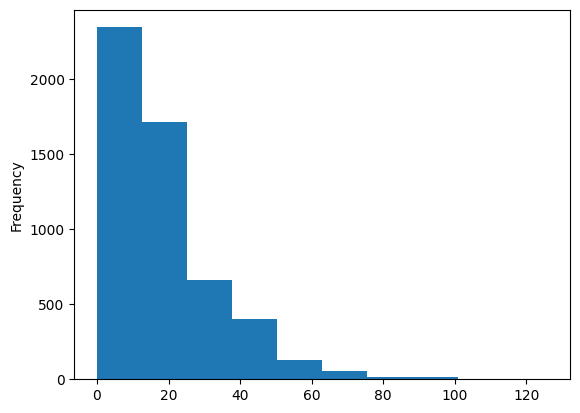

In [59]:
df['nst'].plot(kind='hist')

<Axes: >

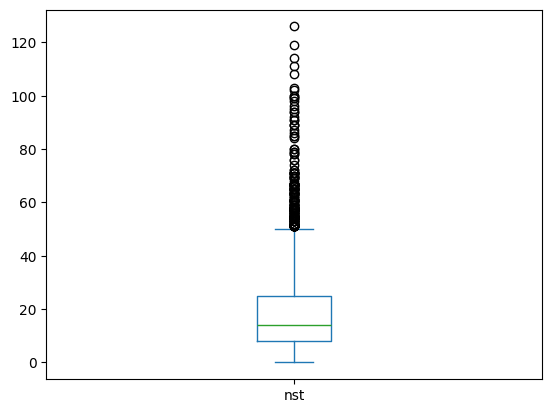

In [60]:
df['nst'].plot(kind='box')

In [61]:
Q1 = df['nst'].quantile(0.25)
Q3 = df['nst'].quantile(0.75)
IQR = Q3 - Q1

In [62]:
df[(df['nst'] < Q1 - 1.5 * IQR) | (df['nst'] > Q3 + 1.5 * IQR)]

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
60,no alert,2.7,37388970,0.04478,1.0,35.0,",ci37388970,",2.15,ml,3.395455,ci,80.0,"2km WNW of Big Bear City, CA",0.18,71.0,",ci,",automatic,1.539452e+12,"M 2.2 - 2km WNW of Big Bear City, CA",0.0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0
103,no alert,2.7,37388730,0.02987,1.0,39.0,",ci37388730,",1.33,ml,3.395455,ci,55.0,"8km ENE of Aguanga, CA",0.17,27.0,",ci,",automatic,1.539435e+12,"M 1.3 - 8km ENE of Aguanga, CA",0.0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0
108,no alert,3.0,73096741,0.02850,7.0,49.0,",nc73096741,",2.81,md,3.395455,nc,54.0,"5km WNW of San Juan Bautista, CA",0.11,124.0,",nc,",automatic,1.539434e+12,"M 2.8 - 5km WNW of San Juan Bautista, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
185,no alert,2.7,37388042,0.02675,1.0,29.0,",ci37388042,",1.72,ml,3.395455,ci,65.0,"6km NE of Anza, CA",0.20,46.0,",ci,",automatic,1.539404e+12,"M 1.7 - 6km NE of Anza, CA",0.0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
186,no alert,2.7,37388034,0.03020,1.0,27.0,",ci37388034,",1.36,ml,3.395455,ci,51.0,"6km NE of Anza, CA",0.17,28.0,",ci,",automatic,1.539404e+12,"M 1.4 - 6km NE of Anza, CA",0.0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9054,no alert,2.7,38064895,0.05816,1.0,31.0,",ci38064895,",1.39,ml,3.395455,ci,51.0,"10km S of Idyllwild, CA",0.18,30.0,",ci,",reviewed,1.537294e+12,"M 1.4 - 10km S of Idyllwild, CA",0.0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0
9061,no alert,2.7,38064847,0.02737,1.0,36.0,",ci38064847,",1.53,ml,3.395455,ci,53.0,"1km SSW of Big Bear Lake, CA",0.12,36.0,",ci,",reviewed,1.537292e+12,"M 1.5 - 1km SSW of Big Bear Lake, CA",0.0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0
9064,no alert,2.7,38064839,0.02893,1.0,21.0,",ci38064839,",2.41,ml,3.395455,ci,95.0,"1km SSW of Big Bear Lake, CA",0.13,89.0,",ci,",reviewed,1.537291e+12,"M 2.4 - 1km SSW of Big Bear Lake, CA",0.0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0
9095,no alert,2.7,70598287,0.11900,2.0,58.0,",hv70598287,us2000hgei,",2.82,ml,3.395455,hv,54.0,"6km SSW of Mountain View, Hawaii",0.10,123.0,",hv,us,",reviewed,1.537284e+12,"M 2.8 - 6km SSW of Mountain View, Hawaii",0.0,earthquake,",dyfi,geoserve,origin,phase-data,",-600.0


In [63]:
df.loc[:, 'nst'] = df['nst'].fillna(df['nst'].median())

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9281 entries, 0 to 9332
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alert    9281 non-null   object 
 1   cdi      9281 non-null   float64
 2   code     9281 non-null   object 
 3   dmin     9281 non-null   float64
 4   felt     9281 non-null   float64
 5   gap      9281 non-null   float64
 6   ids      9281 non-null   object 
 7   mag      9281 non-null   float64
 8   magType  9281 non-null   object 
 9   mmi      9281 non-null   float64
 10  net      9281 non-null   object 
 11  nst      9281 non-null   float64
 12  place    9281 non-null   object 
 13  rms      9281 non-null   float64
 14  sig      9281 non-null   float64
 15  sources  9281 non-null   object 
 16  status   9281 non-null   object 
 17  time     9281 non-null   float64
 18  title    9281 non-null   object 
 19  tsunami  9281 non-null   float64
 20  type     9281 non-null   object 
 21  types    9281 non-n

In [65]:
df['tz'].unique()

array([-480., -300., -540.,  540.,  360., -240., -420.,  420., -600.,
        600.,  480.,  660.,  720.,  240., -660., -360., -720., -180.,
         60.,  300.,  390., -120.,  120.,  -60.,  210.,  270.,  180.,
        330.,    0.,   nan])

<Axes: ylabel='Frequency'>

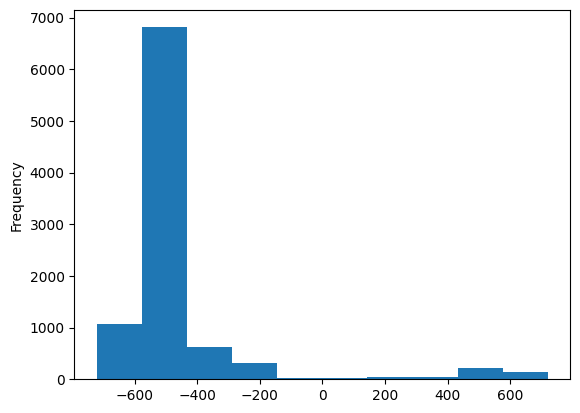

In [66]:
df['tz'].plot(kind='hist')

<Axes: >

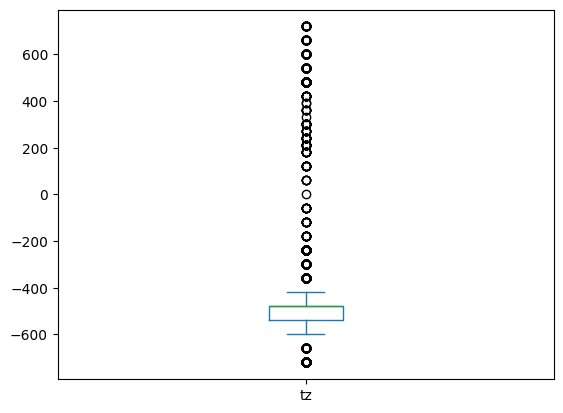

In [67]:
df['tz'].plot(kind='box')

In [68]:
df = df.dropna()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9280 entries, 0 to 9332
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alert    9280 non-null   object 
 1   cdi      9280 non-null   float64
 2   code     9280 non-null   object 
 3   dmin     9280 non-null   float64
 4   felt     9280 non-null   float64
 5   gap      9280 non-null   float64
 6   ids      9280 non-null   object 
 7   mag      9280 non-null   float64
 8   magType  9280 non-null   object 
 9   mmi      9280 non-null   float64
 10  net      9280 non-null   object 
 11  nst      9280 non-null   float64
 12  place    9280 non-null   object 
 13  rms      9280 non-null   float64
 14  sig      9280 non-null   float64
 15  sources  9280 non-null   object 
 16  status   9280 non-null   object 
 17  time     9280 non-null   float64
 18  title    9280 non-null   object 
 19  tsunami  9280 non-null   float64
 20  type     9280 non-null   object 
 21  types    9280 non-n

In [70]:
df.head()

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
0,no alert,2.7,37389218,0.008693,1.0,85.0,",ci37389218,",1.35,ml,3.395455,ci,26.0,"9km NE of Aguanga, CA",0.19,28.0,",ci,",automatic,1.539475e+12,"M 1.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
1,no alert,2.7,37389202,0.020030,1.0,79.0,",ci37389202,",1.29,ml,3.395455,ci,20.0,"9km NE of Aguanga, CA",0.29,26.0,",ci,",automatic,1.539475e+12,"M 1.3 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
3,no alert,2.7,37389186,0.026180,1.0,39.0,",ci37389186,",0.44,ml,3.395455,ci,26.0,"9km NE of Aguanga, CA",0.17,3.0,",ci,",automatic,1.539475e+12,"M 0.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
4,no alert,2.7,73096941,0.077990,1.0,192.0,",nc73096941,",2.16,md,3.395455,nc,18.0,"10km NW of Avenal, CA",0.05,72.0,",nc,",automatic,1.539475e+12,"M 2.2 - 10km NW of Avenal, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0
5,no alert,2.7,2018286011,0.437300,1.0,158.0,",pr2018286011,",2.61,md,3.395455,pr,10.0,"55km ESE of Punta Cana, Dominican Republic",0.41,105.0,",pr,",reviewed,1.539474e+12,"M 2.6 - 55km ESE of Punta Cana, Dominican Repu...",0.0,earthquake,",geoserve,origin,phase-data,",-300.0


# Data Visualization

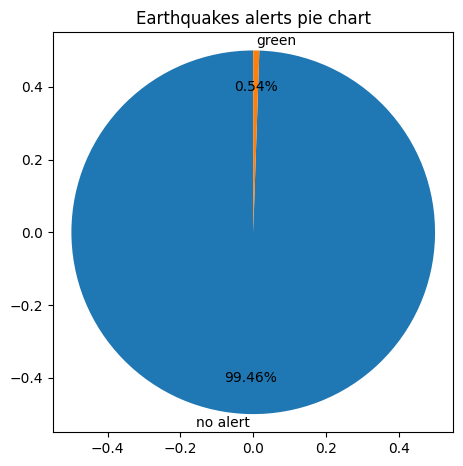

In [71]:
# Use Pie charts to show proportions, especially counts small wide ranges or less categories
alert_labels = df['alert'].unique().tolist()
alert_counts = df['alert'].value_counts().tolist()
alert_explodes = [0] * len(alert_labels)

plt.figure(figsize=(6,4))

plt.pie(
    alert_counts,
    labels=alert_labels,
    labeldistance=1.05,
    explode=alert_explodes,
    autopct='%1.2f%%',
    pctdistance=0.8,
    startangle=90,
    shadow=False,
    radius=0.5,
    frame=True
)

plt.subplots_adjust(left=1, right=2, top=2, bottom=1)

plt.title("Earthquakes alerts pie chart")

plt.show()

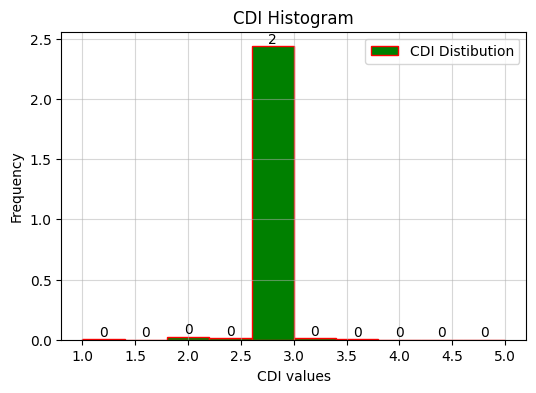

In [72]:
# Use Histogram to show distibution of data
plt.figure(figsize=(6, 4))

counts, bins, patches = plt.hist(
    df['cdi'],
    bins=10,
    density=True,
    cumulative=False,
    color='green',
    edgecolor='red',
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=1,
    log=False,
    label='CDI Distibution'
)

for i in range(len(counts)):
    plt.text((bins[i] + bins[i+1]) / 2, counts[i], str(int(counts[i])), ha='center', va='bottom')

plt.title('CDI Histogram')
plt.xlabel('CDI values')
plt.ylabel('Frequency')
plt.grid(alpha=0.5)

plt.legend()
plt.show()

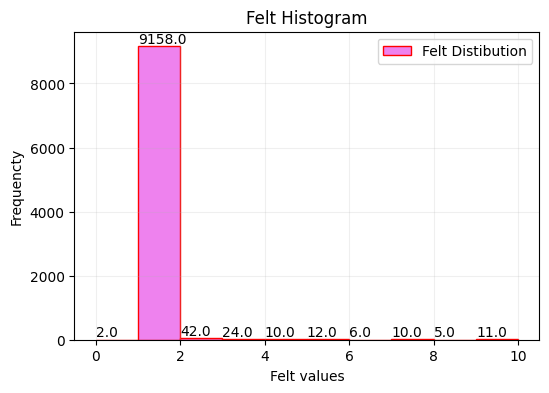

In [73]:
plt.figure(figsize=(6,4))

counts, bins, pathces = plt.hist(
    df['felt'],
    bins=10,
    color='violet',
    edgecolor='red',
    label='Felt Distibution'
)

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha="left", va='bottom')

plt.title('Felt Histogram')
plt.xlabel('Felt values')
plt.ylabel('Frequencty')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

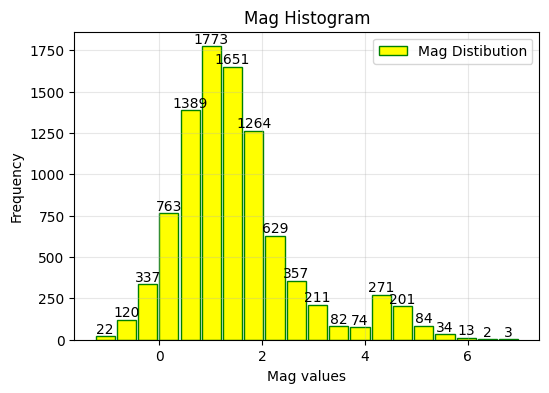

In [74]:
plt.figure(figsize=(6,4))

counts, bins, patches = plt.hist(
    df['mag'],
    bins=20,
    color='yellow',
    edgecolor='green',
    rwidth=0.9,
    label='Mag Distibution'
)

for i in range(len(counts)):
    plt.text((bins[i]+bins[i+1])/2, counts[i], str(int(counts[i])), ha='center', va='bottom')

plt.title('Mag Histogram')
plt.xlabel('Mag values')
plt.ylabel('Frequency')

plt.grid(alpha=0.3)
plt.legend()
plt.show()

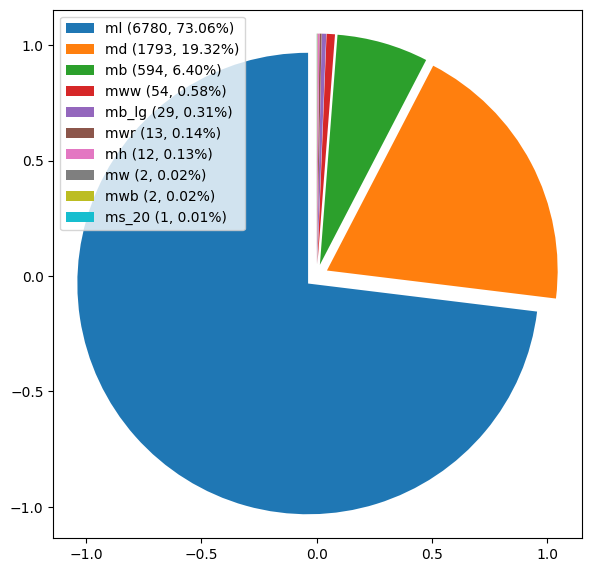

In [75]:
mag_data = df['magType'].value_counts()
magtype_counts = mag_data.values
magtype_labels = mag_data.index
explodes = [0.05] * len(magtype_counts)

plt.figure(figsize=(6,6))

plt.pie(
    magtype_counts,
    pctdistance=0.8,
    startangle=90,
    frame=True,
    explode=explodes
)

leg_labels = [f"{label} ({count}, {count/sum(magtype_counts):.2%})" for count, label in zip(magtype_counts, magtype_labels)]

plt.legend(leg_labels, loc='upper left')

plt.tight_layout()
plt.show()

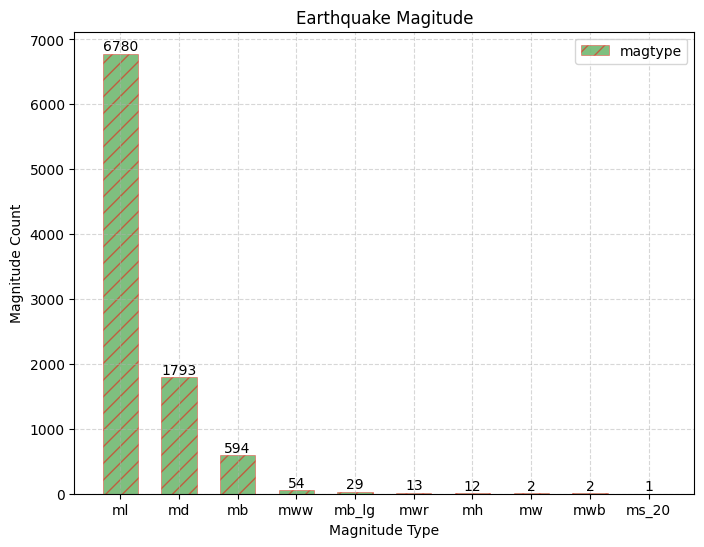

In [76]:
# Use Bar charts to highlight difference between categories, especially counts vary wides or too may categories where pie is not possible.
magtype_data = df['magType'].value_counts()
magtype_data_counts = magtype_data.values
magtype_data_labels = magtype_data.index

plt.figure(figsize=(8,6))

plt.bar(
    magtype_data_labels,
    magtype_data_counts,
    label='magtype',
    color='green',
    edgecolor='red',
    hatch='//',
    width=0.6,
    align='center',
    linewidth=0.5,
    bottom=0,
    alpha=0.5
)

for i, count in enumerate(magtype_data_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Earthquake Magitude')
plt.xlabel('Magnitude Type')
plt.ylabel('Magnitude Count')

plt.grid(linestyle='--',alpha=0.5)
plt.legend(loc='upper right')
plt.show()

In [77]:
place_df = df[df['place'].map(df['place'].value_counts() > 10)]
place_df['place'].value_counts()

place
10km NE of Aguanga, CA                   306
9km NE of Aguanga, CA                    264
42km ENE of Adak, Alaska                  71
22km ENE of Honaunau-Napoopoo, Hawaii     65
8km NE of Aguanga, CA                     59
7km NW of The Geysers, CA                 49
9km NW of The Geysers, CA                 44
8km ENE of Aguanga, CA                    42
9km ENE of Aguanga, CA                    37
78km SSW of Kaktovik, Alaska              36
77km SSW of Kaktovik, Alaska              33
41km ENE of Adak, Alaska                  30
6km NW of The Geysers, CA                 28
43km ENE of Adak, Alaska                  25
9km WNW of Cobb, CA                       23
75km SSW of Kaktovik, Alaska              22
10km WNW of The Geysers, CA               22
4km WSW of Volcano, Hawaii                22
21km W of Dutch Harbor, Alaska            22
6km WNW of Cobb, CA                       21
7km WNW of The Geysers, CA                20
6km W of Cobb, CA                         18
5km 

In [78]:
df.loc[:, 'magType':'status']

,magType,mmi,net,nst,place,rms,sig,sources,status
0,ml,3.395455,ci,26.0,"9km NE of Aguanga, CA",0.19,28.0,",ci,",automatic
1,ml,3.395455,ci,20.0,"9km NE of Aguanga, CA",0.29,26.0,",ci,",automatic
3,ml,3.395455,ci,26.0,"9km NE of Aguanga, CA",0.17,3.0,",ci,",automatic
4,md,3.395455,nc,18.0,"10km NW of Avenal, CA",0.05,72.0,",nc,",automatic
5,md,3.395455,pr,10.0,"55km ESE of Punta Cana, Dominican Republic",0.41,105.0,",pr,",reviewed
...,...,...,...,...,...,...,...,...,...
9328,md,3.395455,nc,13.0,"9km ENE of Mammoth Lakes, CA",0.03,6.0,",nc,",reviewed
9329,ml,3.395455,ci,28.0,"3km W of Julian, CA",0.21,15.0,",ci,",reviewed
9330,md,3.395455,pr,9.0,"35km NNE of Hatillo, Puerto Rico",0.41,89.0,",pr,",reviewed
9331,ml,3.395455,ci,27.0,"9km NE of Aguanga, CA",0.10,19.0,",ci,",reviewed


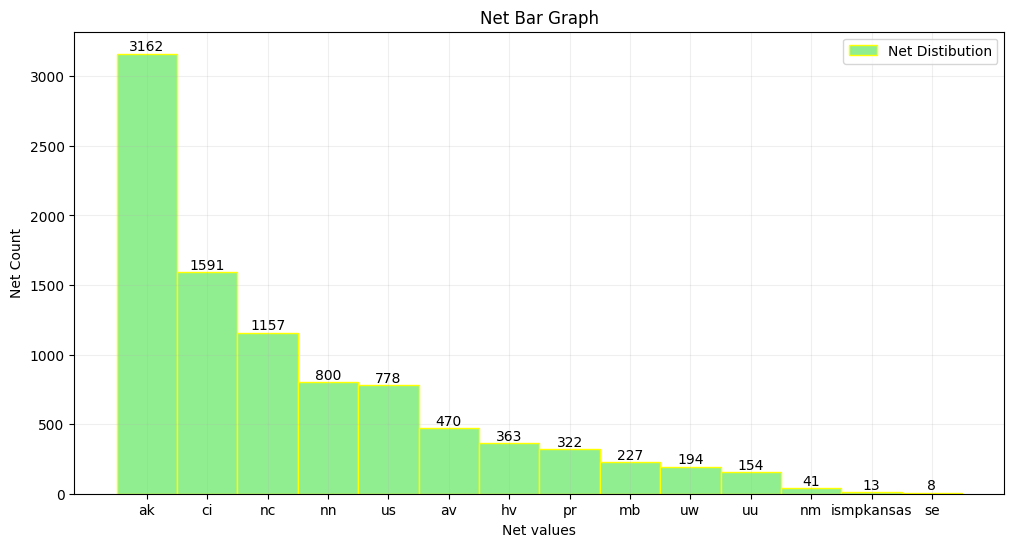

In [79]:
plt.figure(figsize=(12,6))
net_data = df['net'].value_counts()
net_counts = net_data.values
net_labels = net_data.index

plt.bar(
    net_labels,
    net_counts,
    label='Net Distibution',
    color='lightgreen',
    edgecolor='yellow',
    width=1
)

for i, count in enumerate(net_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Net Bar Graph')
plt.xlabel('Net values')
plt.ylabel('Net Count')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

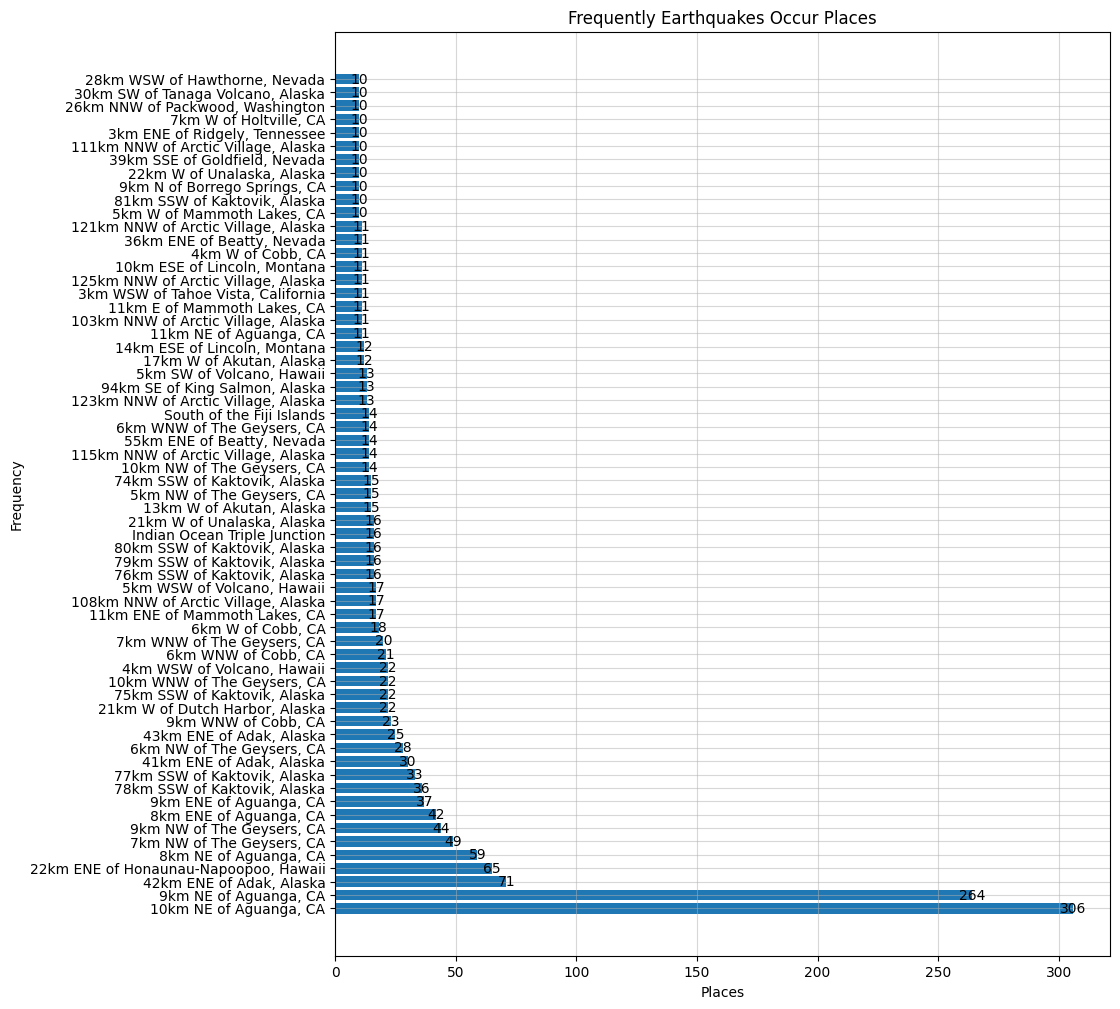

In [80]:
places_df = df['place'].value_counts()
places_data = places_df[places_df >= 10]

plt.figure(figsize=(10,12))

plt.barh(
    places_data.index,
    places_data.values
)
for i, count in enumerate(places_data.values):
    plt.text(count, i, str(count), va='center', ha='center')

plt.title('Frequently Earthquakes Occur Places')
plt.xlabel('Places')
plt.ylabel('Frequency')

plt.grid(alpha=0.5)
plt.show()

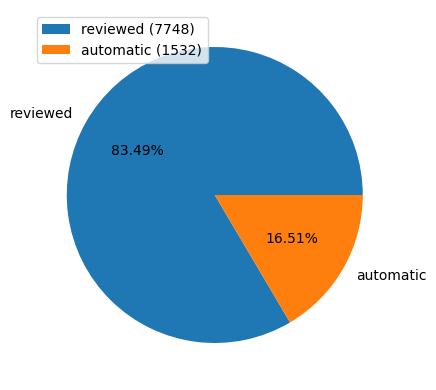

In [81]:
status_counts = df['status'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(
    status_counts.values,
    labels=status_counts.index,
    autopct='%1.2f%%'
)

leg_labels = [f"{label} ({count})" for count, label in zip(status_counts.values, status_counts.index)]

plt.legend(leg_labels, loc='upper left')

plt.tight_layout()

plt.show()

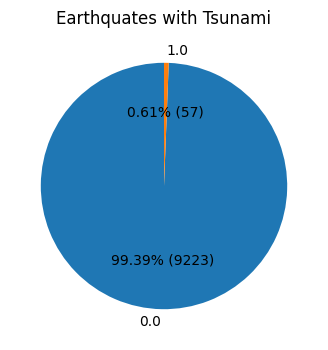

In [82]:
tsunami_data = df['tsunami'].value_counts()
tsunami_labels = tsunami_data.index
tsunami_values = tsunami_data.values

def custom_auto_pct(values):
    def inner_auto_pct(pct):
        return f"{pct:.2f}% ({round((pct * sum(values)) / 100)})"
    return inner_auto_pct

plt.figure(figsize=(6, 4))
plt.pie(
    tsunami_values,
    labels=tsunami_labels,
    autopct=custom_auto_pct(tsunami_values),
    startangle=90
)
plt.title("Earthquates with Tsunami")

plt.show()

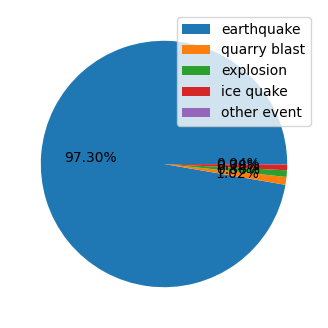

In [83]:
type_data = df['type'].value_counts()
type_labels = type_data.index
type_values = type_data.values

plt.figure(figsize=(6,4))
plt.pie(
    type_values,
    autopct="%1.2f%%",
    labeldistance=1
)

plt.legend(type_labels, loc='upper right')


plt.show()

In [84]:
df

,alert,cdi,code,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz
0,no alert,2.7,37389218,0.008693,1.0,85.0,",ci37389218,",1.35,ml,3.395455,ci,26.0,"9km NE of Aguanga, CA",0.19,28.0,",ci,",automatic,1.539475e+12,"M 1.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
1,no alert,2.7,37389202,0.020030,1.0,79.0,",ci37389202,",1.29,ml,3.395455,ci,20.0,"9km NE of Aguanga, CA",0.29,26.0,",ci,",automatic,1.539475e+12,"M 1.3 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
3,no alert,2.7,37389186,0.026180,1.0,39.0,",ci37389186,",0.44,ml,3.395455,ci,26.0,"9km NE of Aguanga, CA",0.17,3.0,",ci,",automatic,1.539475e+12,"M 0.4 - 9km NE of Aguanga, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
4,no alert,2.7,73096941,0.077990,1.0,192.0,",nc73096941,",2.16,md,3.395455,nc,18.0,"10km NW of Avenal, CA",0.05,72.0,",nc,",automatic,1.539475e+12,"M 2.2 - 10km NW of Avenal, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0
5,no alert,2.7,2018286011,0.437300,1.0,158.0,",pr2018286011,",2.61,md,3.395455,pr,10.0,"55km ESE of Punta Cana, Dominican Republic",0.41,105.0,",pr,",reviewed,1.539474e+12,"M 2.6 - 55km ESE of Punta Cana, Dominican Repu...",0.0,earthquake,",geoserve,origin,phase-data,",-300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,no alert,2.7,73086771,0.018060,1.0,185.0,",nc73086771,",0.62,md,3.395455,nc,13.0,"9km ENE of Mammoth Lakes, CA",0.03,6.0,",nc,",reviewed,1.537230e+12,"M 0.6 - 9km ENE of Mammoth Lakes, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
9329,no alert,2.7,38063967,0.030410,1.0,50.0,",ci38063967,",1.00,ml,3.395455,ci,28.0,"3km W of Julian, CA",0.21,15.0,",ci,",reviewed,1.537230e+12,"M 1.0 - 3km W of Julian, CA",0.0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0
9330,no alert,2.7,2018261000,0.452600,1.0,276.0,",pr2018261000,",2.40,md,3.395455,pr,9.0,"35km NNE of Hatillo, Puerto Rico",0.41,89.0,",pr,",reviewed,1.537230e+12,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",0.0,earthquake,",geoserve,origin,phase-data,",-240.0
9331,no alert,2.7,38063959,0.018650,1.0,61.0,",ci38063959,",1.10,ml,3.395455,ci,27.0,"9km NE of Aguanga, CA",0.10,19.0,",ci,",reviewed,1.537230e+12,"M 1.1 - 9km NE of Aguanga, CA",0.0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0
